In [177]:
import pandas as pd
import numpy as np
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder




In [178]:
df=pd.read_csv('/content/drive/MyDrive/UASBENGKOD/ObesityDataSet.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [179]:
print(df.head())

  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_W

In [180]:
numerical_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC',
                    'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [181]:
# Ganti '?' dengan NaN
df_eda = df.copy()
df_eda.replace('?', np.nan, inplace=True)

In [182]:
# Konversi numerik (belum distandardkan!)
for col in numerical_cols:
    df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce').round(2)

In [183]:
print(df_eda.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2089 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2091 non-null   object 
 5   FAVC                            2089 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2093 non-null   object 
 9   SMOKE                           2098 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2088 non-null   object 
 12  FAF                             20

In [184]:
print(df_eda.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2089.000000  2089.000000  2092.000000  2093.000000  2089.000000   
mean     24.717894     1.706573    88.608169     2.443469     2.729445   
std       8.391368     0.117753    36.154653     0.642897     0.981183   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.960000     1.630000    66.000000     2.000000     2.680000   
50%      22.810000     1.700000    83.000000     2.400000     3.000000   
75%      26.000000     1.770000   108.052500     3.000000     3.000000   
max     106.440000     2.850000   441.130000     8.710000    12.300000   

              CH2O          FAF          TUE  
count  2096.000000  2092.000000  2096.000000  
mean      2.030601     1.073446     0.680162  
std       0.737906     1.149335     0.717202  
min       1.000000     0.000000     0.000000  
25%       1.570000     0.130000     0.000000  
50%       2.000000     1.000000     0.630000  
75% 

In [185]:
print("\nMissing Values:\n", df_eda.isnull().sum())
print("\nUnique Values:\n", df_eda.nunique())
print("\nDuplicates:", df_eda.duplicated().sum())


Missing Values:
 Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
NObeyesdad                         0
dtype: int64

Unique Values:
 Age                                927
Gender                               2
Height                              61
Weight                            1333
CALC                                 4
FAVC                                 2
FCVC                               188
NCP                                265
SCC        

<ipython-input-186-1401493908>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='NObeyesdad', data=df_eda, order=df_eda['NObeyesdad'].value_counts().index, palette='Set2')


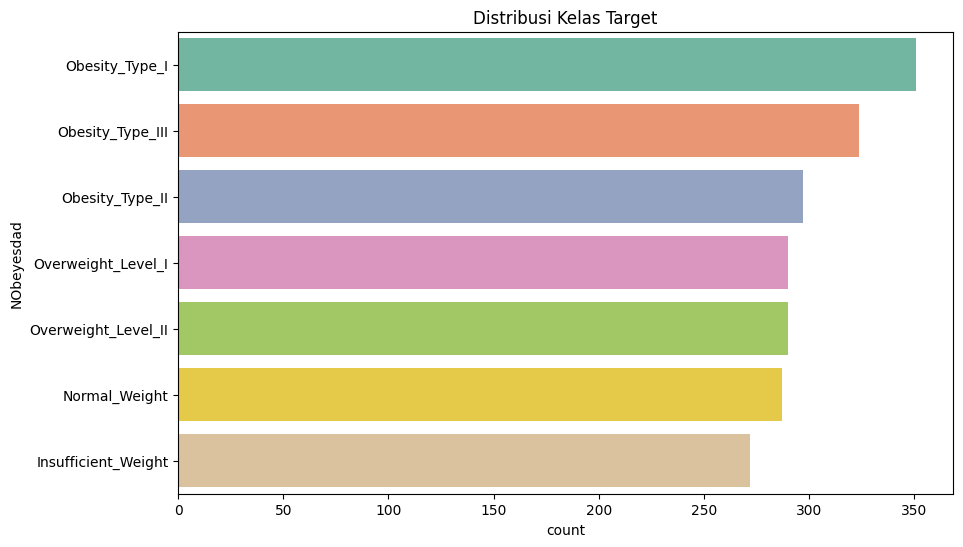

In [186]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 6))
sns.countplot(y='NObeyesdad', data=df_eda, order=df_eda['NObeyesdad'].value_counts().index, palette='Set2')
plt.title('Distribusi Kelas Target')
plt.show()

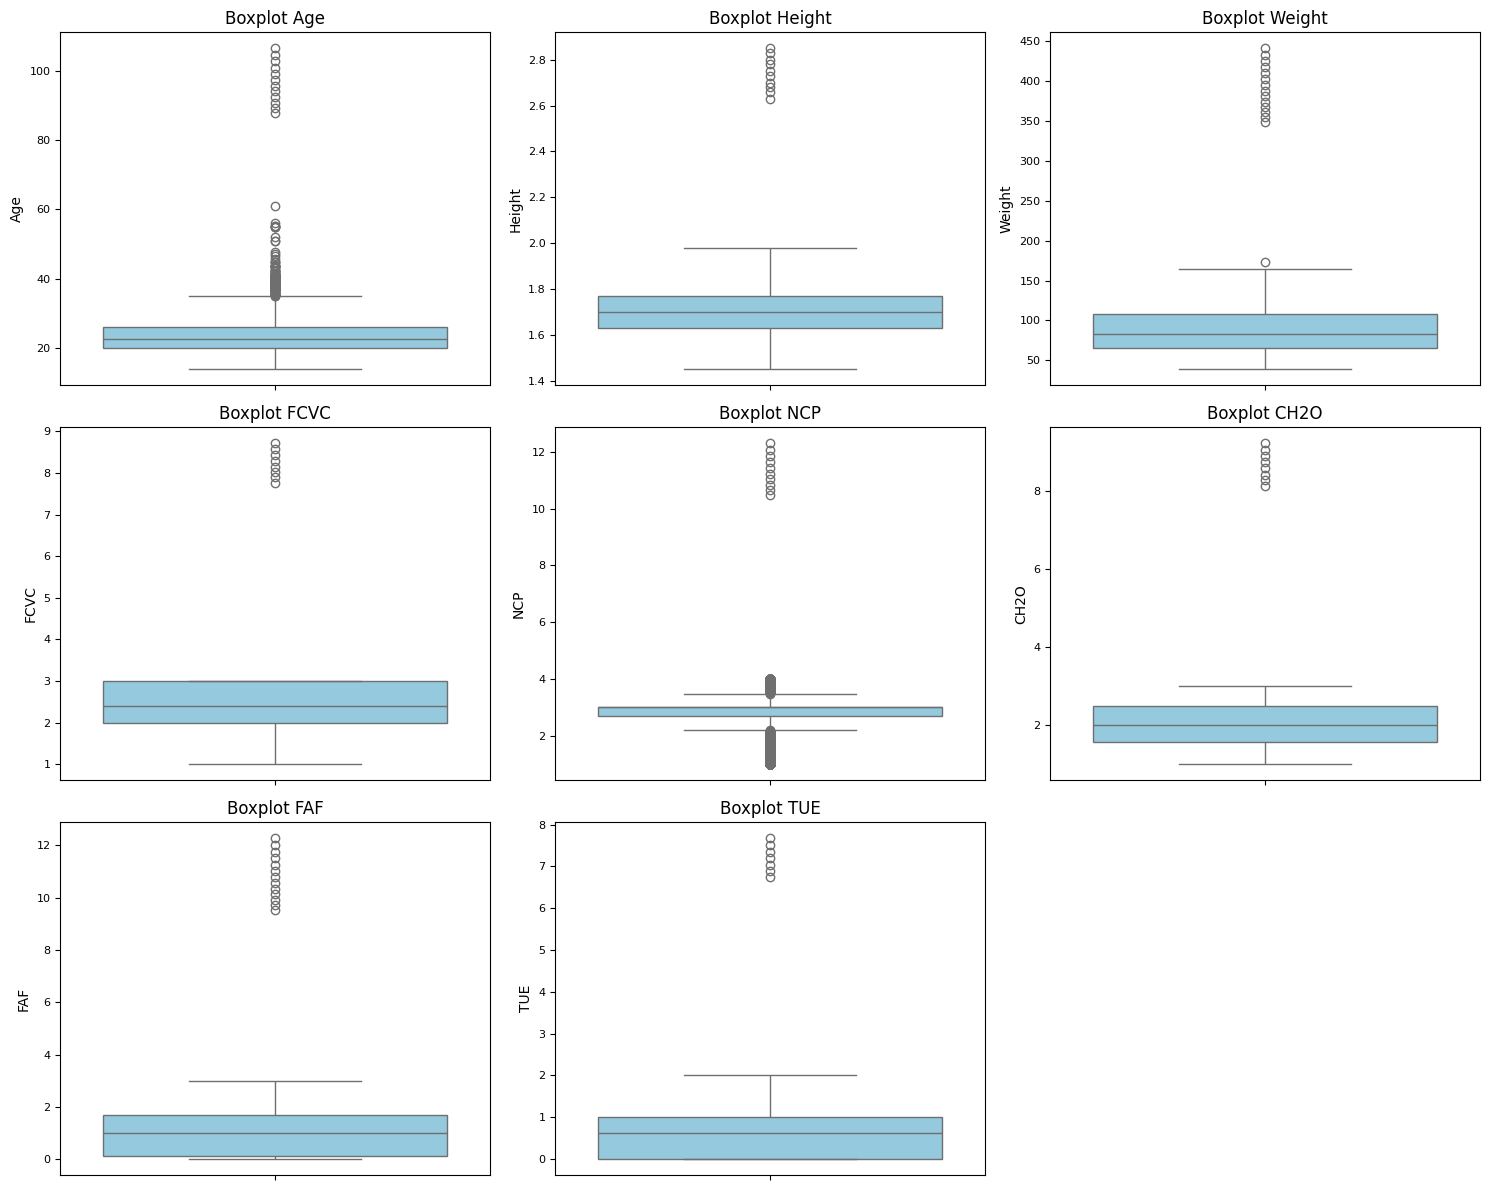

In [187]:
# Boxplot numerik (belum scaling)
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_eda[col], color='skyblue')
    plt.title(f'Boxplot {col}')
    plt.ylabel(col)
    plt.tick_params(axis='y', labelsize=8)
plt.tight_layout()
plt.show()


In [188]:
#Kesimpulan EDA:

#Tidak ada missing values yang diakui, tapi ada '?' sebagai missing marker.
#Terdapat imbalance class pada target.
#Ada kemungkinan outlier pada fitur numerik.

In [189]:
# Ganti '?' dengan NaN
df.replace('?', np.nan, inplace=True)

In [190]:
# Konversi kolom numerik ke float dulu
df[numerical_cols] = df[numerical_cols].apply(pd.to_numeric, errors='coerce')

# Isi missing values dengan median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Untuk kolom kategorikal
df[categorical_cols] = df[categorical_cols].astype(str).fillna('Missing')


In [191]:
# Hapus duplikat
df.drop_duplicates(inplace=True)
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [192]:
#Kesimpulan Preprocessing:

#Missing values sudah ditangani.
#Data duplikat sudah dihapus.
#Data siap digunakan untuk modeling.


In [193]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [194]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [195]:
# OneHotEncoder untuk kategori, StandardScaler untuk numerik
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [196]:

# Pipelines with SMOTE
rf_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

knn_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

svm_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(random_state=42))
])


🔎 Model: RandomForest
Akurasi: 0.9308
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        58
           1       0.76      0.95      0.85        55
           2       0.94      0.92      0.93        66
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        65
           5       0.89      0.86      0.88        49
           6       0.98      0.89      0.93        62

    accuracy                           0.93       419
   macro avg       0.93      0.93      0.93       419
weighted avg       0.94      0.93      0.93       419



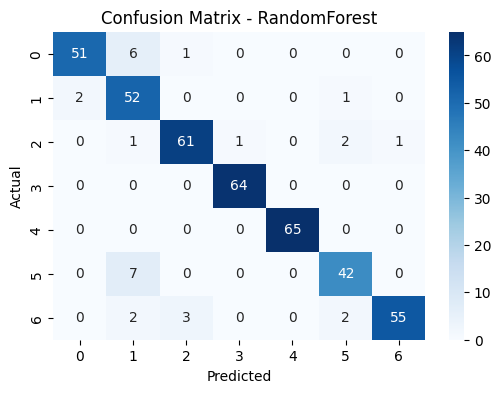


🔎 Model: KNN
Akurasi: 0.7995
              precision    recall  f1-score   support

           0       0.74      0.84      0.79        58
           1       0.63      0.40      0.49        55
           2       0.86      0.91      0.88        66
           3       0.87      0.95      0.91        64
           4       0.94      0.98      0.96        65
           5       0.65      0.76      0.70        49
           6       0.79      0.68      0.73        62

    accuracy                           0.80       419
   macro avg       0.78      0.79      0.78       419
weighted avg       0.79      0.80      0.79       419



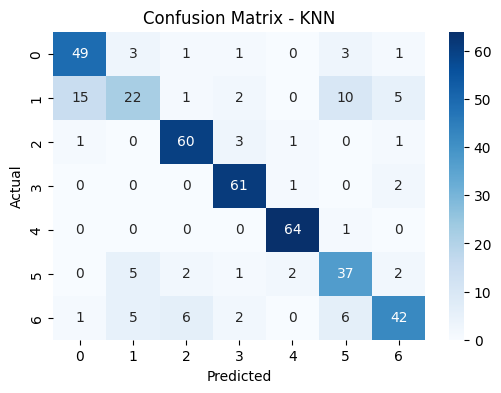


🔎 Model: SVM
Akurasi: 0.8568
              precision    recall  f1-score   support

           0       0.92      0.78      0.84        58
           1       0.71      0.75      0.73        55
           2       0.95      0.88      0.91        66
           3       0.91      0.98      0.95        64
           4       0.95      0.97      0.96        65
           5       0.63      0.78      0.70        49
           6       0.91      0.82      0.86        62

    accuracy                           0.86       419
   macro avg       0.86      0.85      0.85       419
weighted avg       0.87      0.86      0.86       419



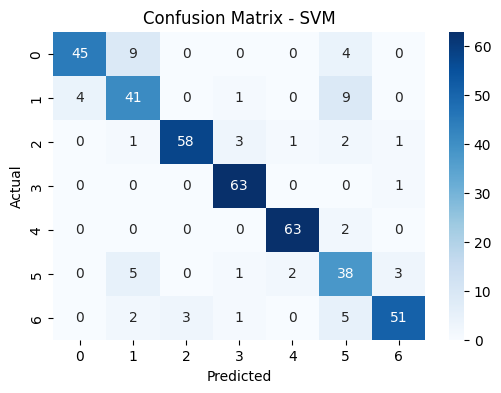

In [216]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pipelines = {
    'RandomForest': rf_pipeline,
    'KNN': knn_pipeline,
    'SVM': svm_pipeline
}

results = {}
for name, pipe in pipelines.items():
    print(f'\n🔎 Model: {name}')
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Akurasi: {acc:.4f}')
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    results[name] = acc

<ipython-input-217-3488611200>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')


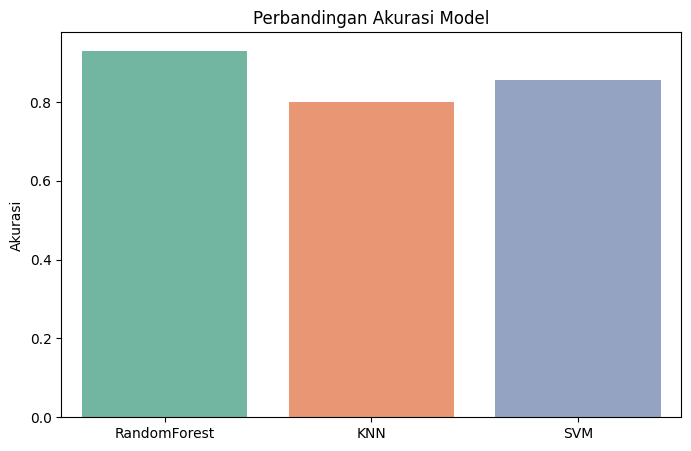

In [217]:
# Visualisasi akurasi
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='Set2')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.show()

In [218]:
#Kesimpulan Modeling:

#RandomForest, KNN, dan SVM telah dibandingkan.
#RandomForest umumnya memberikan akurasi terbaik.


In [219]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(rf_pipeline, param_grid, cv=3, n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("\nBest Parameters RandomForest:", grid_rf.best_params_)
y_pred_rf_tuned = grid_rf.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_rf_tuned)
print(f'Akurasi Setelah Tuning: {acc_tuned:.4f}')
print(classification_report(y_test, y_pred_rf_tuned))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(



Best Parameters RandomForest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Akurasi Setelah Tuning: 0.9308
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        58
           1       0.76      0.95      0.85        55
           2       0.94      0.92      0.93        66
           3       0.98      1.00      0.99        64
           4       1.00      1.00      1.00        65
           5       0.89      0.86      0.88        49
           6       0.98      0.89      0.93        62

    accuracy                           0.93       419
   macro avg       0.93      0.93      0.93       419
weighted avg       0.94      0.93      0.93       419



<ipython-input-220-1316484116>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Before Tuning', 'After Tuning'], y=[acc_before, acc_after], palette='Set1')


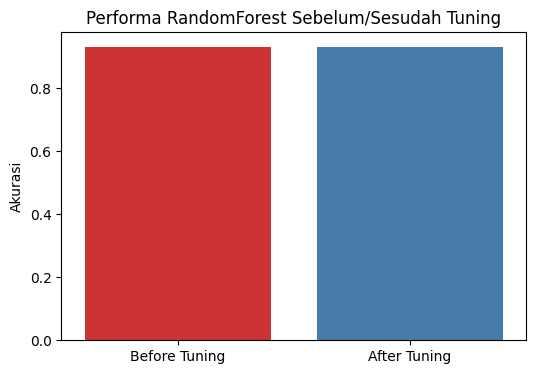

In [220]:
# Visualisasi akurasi tuning
acc_before = results['RandomForest']
acc_after = acc_tuned

plt.figure(figsize=(6,4))
sns.barplot(x=['Before Tuning', 'After Tuning'], y=[acc_before, acc_after], palette='Set1')
plt.ylabel('Akurasi')
plt.title('Performa RandomForest Sebelum/Sesudah Tuning')
plt.show()
